<a href="https://colab.research.google.com/github/sainihalk/Wine_quality_project/blob/main/Wine_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [ ]:
red_wine=pd.read_csv('/content/winequality_red.csv')
red_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
red_wine.isna().sum()

type                    0
fixed acidity           2
volatile acidity        1
citric acid             1
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      2
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [ ]:
red_wine['fixed acidity']=red_wine['fixed acidity'].fillna(red_wine['fixed acidity'].mean())
red_wine['volatile acidity']=red_wine['volatile acidity'].fillna(red_wine['volatile acidity'].median())
red_wine['citric acid']=red_wine['citric acid'].fillna(red_wine['citric acid'].median())
red_wine['pH']=red_wine['pH'].fillna(red_wine['pH'].mean())
red_wine['sulphates']=red_wine['sulphates'].fillna(red_wine['sulphates'].mean())

In [ ]:
red_wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1599 non-null   object 
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.322104,0.527733,0.271138,2.538806,0.087467,15.874922,46.467792,0.996747,3.310864,0.658078,10.422983,5.636023
std,1.739677,0.179029,0.194683,1.409928,0.047065,10.460157,32.895324,0.001887,0.154193,0.169488,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
red_wine.corr()

<ipython-input-51-915fdc92904e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  red_wine.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255581,0.670745,0.114870,0.093350,-0.154546,-0.114259,0.667650,-0.682458,0.183874,-0.061376,0.123803
volatile acidity,-0.255581,1.000000,-0.553015,0.001932,0.061511,-0.011354,0.075657,0.022706,0.234458,-0.261460,-0.203414,-0.390845
citric acid,0.670745,-0.553015,1.000000,0.143404,0.203796,-0.059167,0.035771,0.364660,-0.541041,0.314264,0.110736,0.226886
residual sugar,0.114870,0.001932,0.143404,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085871,0.005576,0.042075,0.013732
chlorides,0.093350,0.061511,0.203796,0.055610,1.000000,0.005562,0.047400,0.200632,-0.264967,0.371473,-0.221141,-0.128907
free sulfur dioxide,-0.154546,-0.011354,-0.059167,0.187049,0.005562,1.000000,0.667666,-0.021946,0.071079,0.050839,-0.069408,-0.050656
total sulfur dioxide,-0.114259,0.075657,0.035771,0.203028,0.047400,0.667666,1.000000,0.071269,-0.065536,0.042921,-0.205654,-0.185100
density,0.667650,0.022706,0.364660,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341315,0.148847,-0.496180,-0.174919
pH,-0.682458,0.234458,-0.541041,-0.085871,-0.264967,0.071079,-0.065536,-0.341315,1.000000,-0.197577,0.205772,-0.057079
sulphates,0.183874,-0.261460,0.314264,0.005576,0.371473,0.050839,0.042921,0.148847,-0.197577,1.000000,0.093307,0.251345


<ipython-input-52-dd1082e7aa83>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(red_wine.corr(),cmap="hot",annot=True)


<Axes: title={'center': 'Heat Map'}>

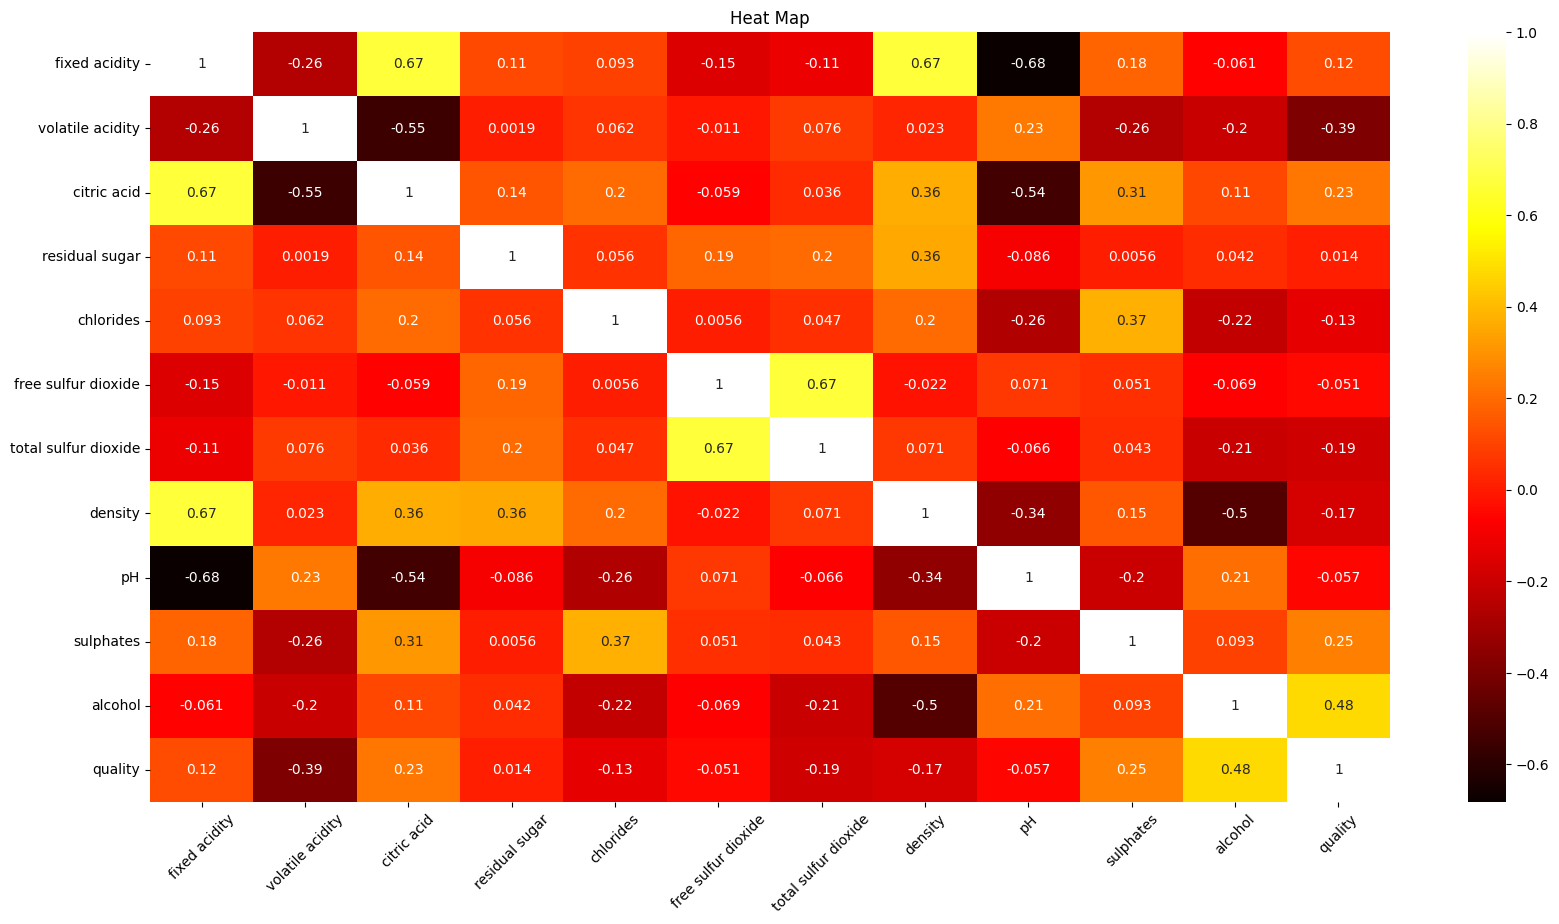

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.title("Heat Map")
sns.heatmap(red_wine.corr(),cmap="hot",annot=True)

In [ ]:
red_wine['quality'] = red_wine['quality'].apply(lambda x: 0 if x < 6 else 1)
print(red_wine['quality'].sum())
red_wine.shape

855


(1599, 13)

In [ ]:
red_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,0
1,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.680000,9.8,0
2,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.650000,9.8,0
3,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.580000,9.8,1
4,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.560000,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
1595,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.658078,11.2,1
1596,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
1597,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


In [ ]:
red_wine=red_wine.drop('type',axis=1)

In [ ]:
x=red_wine.drop("quality",axis=1)
y=red_wine['quality']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
986,9.8,0.34,0.39,1.4,0.066,3.0,7.0,0.99470,3.19,0.55,11.4
928,8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.2
331,10.2,0.36,0.64,2.9,0.122,10.0,41.0,0.99800,3.23,0.66,12.5
1463,6.9,0.63,0.01,2.4,0.076,14.0,39.0,0.99522,3.34,0.53,10.8
1212,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4
...,...,...,...,...,...,...,...,...,...,...,...
792,7.1,0.61,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7
402,12.2,0.48,0.54,2.6,0.085,19.0,64.0,1.00000,3.10,0.61,10.5
1057,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0


In [ ]:
reg=linear_model.LogisticRegression()

In [ ]:
reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction=reg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.72      0.71      0.71       224\n           1       0.75      0.76      0.75       256\n\n    accuracy                           0.74       480\n   macro avg       0.73      0.73      0.73       480\nweighted avg       0.74      0.74      0.74       480\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[158,  66],
       [ 61, 195]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7354166666666667